In [1]:
from time import time
import numpy as np
import astropy.units as u
import astropy.constants as c
import astropy.io.fits as pf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import gpr
import mcmc
import forAustin as fa

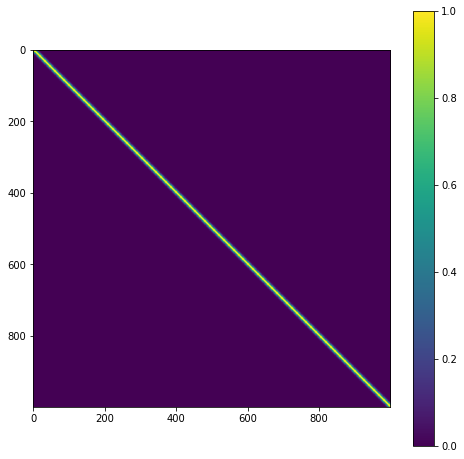

In [190]:
X = np.linspace(-100, 100, num=1000)
Y = np.linspace(-100, 100, num=1000)
x1, x2 = np.meshgrid(X, X)
y1, y2 = np.meshgrid(Y, Y)

sigma_x = 100
sigma_y = 1
theta = (0 * u.deg).to(u.rad)

a = np.cos(theta)**2 / (2 * sigma_x**2) + np.sin(theta)**2 / (2 * sigma_y**2)
b = - np.sin(2 * theta) / (4 * sigma_x**2) + np.sin(2 * theta) / (4 * sigma_y**2)
c = np.sin(theta)**2 / (2 * sigma_x**2) + np.cos(theta)**2 / (2 * sigma_y**2)

def Kernel(x1, x2, y1, y2, a, b, c):
    x = a * (x1 - x2)**2
    y = c * (y1 - y2)**2
    xy = 2 * b * (x1 - x2)*(y1 - y2)
    return np.exp(-(x + y + xy))

K = Kernel(x1, x2, y1, y2, a, b, c)
plt.figure(figsize=(8, 8))
plt.imshow(K)
plt.colorbar()
plt.show()

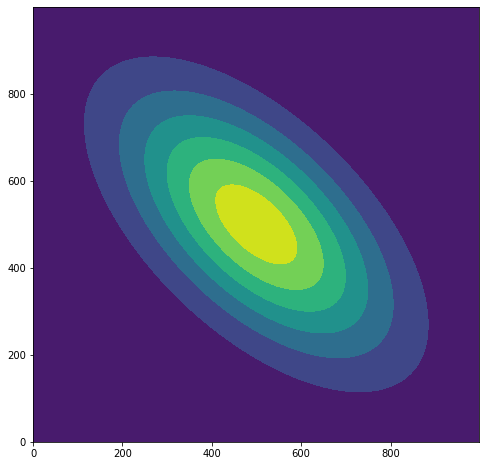

In [169]:
X = np.linspace(-100, 100, num=1000)
Y = np.linspace(-100, 100, num=1000)
xx, yy = np.meshgrid(X, Y)

sigma_x = 50
sigma_y = 25
theta = (45 * u.deg).to(u.rad)

a = np.cos(theta)**2 / (2 * sigma_x**2) + np.sin(theta)**2 / (2 * sigma_y**2)
b = - np.sin(2 * theta) / (4 * sigma_x**2) + np.sin(2 * theta) / (4 * sigma_y**2)
c = np.sin(theta)**2 / (2 * sigma_x**2) + np.cos(theta)**2 / (2 * sigma_y**2)

def Kernel(xx, yy, a, b, c):
    x = a * xx**2
    y = c * yy**2
    xy = 2 * b * xx*yy
    return np.exp(-(x + y + xy))

K = Kernel(xx, yy, a, b, c)
plt.figure(figsize=(8, 8))
plt.contourf(K)
plt.show()